In [1]:
print("hello")

hello


In [2]:

from openai import OpenAI
import os
client = OpenAI(
    api_key=os.environ.get("GROQ_API_KEY"),
    base_url="https://api.groq.com/openai/v1",
)

response = client.responses.create(
    input="Explain the importance of fast language models",
    model="openai/gpt-oss-20b",
)
print(response.output_text)



## Why “Fast” Language Models Matter

In the world of large‑scale language models (LLMs), *speed*—both during training and, most critically, during inference—has become a key differentiator. A fast model can deliver the same intelligence with fewer resources, lower cost, and a much better user experience. Below, we unpack the technical, business, and societal reasons why speed is essential, what it means for developers and consumers, and how the community is making models quicker.

| Domain | What speed enables | Typical impact |
|--------|--------------------|----------------|
| **Real‑time chatbots & virtual assistants** | < 200 ms per response (≤1 token ≈ 5 ms) | Natural conversations that feel “live” |
| **Search & retrieval** | Sub‑second ranking | Instant answer fetching |
| **Autonomous systems (e.g., self‑driving, robotics)** | ≤10 ms per decision | Safe, responsive control |
| **Edge & mobile devices** | < 50 ms, < 200 mW | Battery‑friendly, offline use |
| **Large‑scale deplo

In [3]:
from typing_extensions import TypedDict

In [4]:
class State(TypedDict):
    graph_info:str

In [5]:
def start_play(state:State):
    print("Start - play function calling")
    return {
        "graph_info":state['graph_info'] + " I am planning to start play"
    }
    
    
def cricket(state:State):
    print("my cricket node has been called")
    return {
        "graph_info":state['graph_info'] + " Cricket"
    }
    

def badmiton(state:State):
    print("my cricket node has been called")
    return {
        "graph_info":state['graph_info'] + " Badmiton"}


import random 
from typing import Literal


def randplay(state:State)->Literal['cricket','badmiton']:
    graph_info = state['graph_info']
    if random.random()>0.5:
        return "cricket"
    else:
        return "badmiton"
    

In [6]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,END,START

In [7]:
## Building Graph
graph = StateGraph(State)

In [8]:
graph.add_node("start_play",start_play)

In [9]:
graph.add_node("cricket",cricket)

In [10]:
graph.add_node("badmiton",badmiton)

In [11]:
graph.add_edge(START,"start_play")
graph.add_conditional_edges(
    "start_play",randplay
)
graph.add_edge("cricket",END)
graph.add_edge("badmiton",END)

In [12]:
builder = graph.compile()

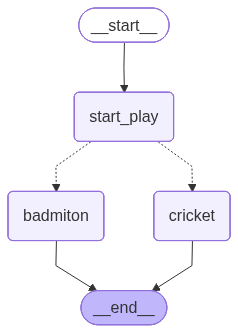

In [13]:
display(
    Image(
        builder.get_graph().draw_mermaid_png()
    )
)

In [14]:
builder.invoke(
    {
        "graph_info"
:"my name is chan"    }
)

Start - play function calling
my cricket node has been called


{'graph_info': 'my name is chan I am planning to start play Badmiton'}

In [15]:
from langgraph.graph import StateGraph,END,START
from typing_extensions import TypedDict

from typing import Annotated,List
from langgraph.graph.message import add_messages

import os
from dotenv import load_dotenv
load_dotenv()

True

In [16]:
class State(TypedDict):
    message : Annotated[List,add_messages]

In [17]:
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")

In [18]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [19]:
# from langchain_google_genai import ChatGoogleGenerativeAI

# llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash",google_api_key =os.environ["GOOGLE_API_KEY"] )
# result = llm.invoke("Sing a ballad of LangChain.")
# print(result)

In [20]:
from langchain_groq import ChatGroq
client = ChatGroq(
    
    api_key=os.environ.get("GROQ_API_KEY"),
    model = "openai/gpt-oss-120b"
)

In [21]:
client.invoke("hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'reasoning_content': 'We need to respond. The user said "hi". Just greet and ask how can help.'}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 72, 'total_tokens': 110, 'completion_time': 0.079163068, 'prompt_time': 0.002763162, 'queue_time': 0.048609657, 'total_time': 0.08192623, 'completion_tokens_details': {'reasoning_tokens': 20}}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_70d048ba3c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--0ccf6594-5fd2-44b9-994d-51daa0b73f6a-0', usage_metadata={'input_tokens': 72, 'output_tokens': 38, 'total_tokens': 110})

In [22]:
def super_bot(state:State):
    return {
        "message":[client.invoke(state['message'])]
    }

In [23]:
graph_builder = StateGraph(State)

In [24]:
graph_builder.add_node("SUPER_BOT",
    super_bot
)

In [25]:
graph_builder.add_edge(START,"SUPER_BOT")

In [26]:
graph_builder.add_edge("SUPER_BOT",END)

In [28]:
compiled_graph = graph_builder.compile()

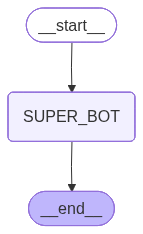

In [29]:
display(
    Image(
        compiled_graph.get_graph().draw_mermaid_png()
    )
)

In [30]:
super_bot({
    "message":"HI how are you"
})

{'message': [AIMessage(content="Hello! I'm doing great, thank you. How can I assist you today?", additional_kwargs={'reasoning_content': 'The user says "HI how are you". It\'s a casual greeting. I should respond politely. No policy issues.'}, response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 75, 'total_tokens': 124, 'completion_time': 0.103301945, 'prompt_time': 0.002760273, 'queue_time': 0.047977237, 'total_time': 0.106062218, 'completion_tokens_details': {'reasoning_tokens': 24}}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_e88ce9c728', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--d41851a3-f5a9-49e2-9b91-16341edb55a4-0', usage_metadata={'input_tokens': 75, 'output_tokens': 49, 'total_tokens': 124})]}

In [34]:
compiled_graph.invoke({
    "message":"do you know about FASTMCP"
}
)

{'message': [HumanMessage(content='do you know about FASTMCP', additional_kwargs={}, response_metadata={}, id='740bd5c6-a0a5-404b-8b4b-270fd382181f'),
  AIMessage(content="Yes—I’m familiar with **FASTMCP** (Fast Multi‑Channel Protocol). It’s a communication framework that was created to enable high‑throughput, low‑latency data exchange across multiple logical channels over a single physical link. Here’s a quick overview of the main ideas behind it:\n\n| Aspect | What FASTMCP Provides |\n|--------|------------------------|\n| **Purpose** | Efficiently multiplex several independent data streams (e.g., video, telemetry, control commands) over one transport medium while keeping each stream isolated and ordered. |\n| **Core Design** | • **Channel IDs** – each logical channel is assigned a 16‑bit identifier. <br>• **Frame Header** – a compact header (typically 4–8\u202fbytes) that carries the channel ID, payload length, and optional flags (e.g., priority, reliability). <br>• **Packetization*